In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [116]:
dataset = np.loadtxt('upd-combined-education-vaccine-set.csv', delimiter=',')
X = dataset[:,2:9]
Y = dataset[:,1]

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33)
model = xgb.XGBRegressor()

[0.22819003 0.13567021 0.13870367 0.13986568 0.20332575 0.15424463]


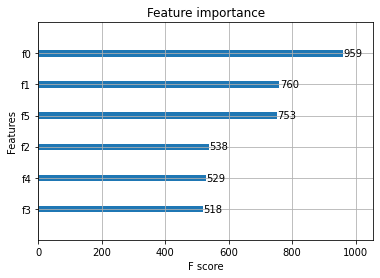

Training score:  0.9561105030625855


In [118]:
model.fit(xtrain, ytrain)
print(model.feature_importances_)
xgb.plot_importance(model)
plt.show()
score = model.score(xtrain, ytrain)
print("Training score: ", score)

In [111]:
scores = cross_val_score(model, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.10


In [112]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, xtrain, ytrain, cv=kfold)
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.09


In [113]:
ypred = model.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.01
RMSE: 0.11


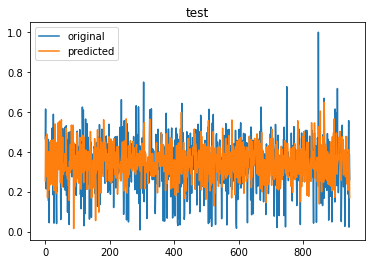

In [114]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test")
plt.legend()
plt.show()